In [2]:
# Applied Data Analysis School: October/november 2020
# 6. REGRESSION ANALYSIS AND CAUSALITY WITH R | By: João Cerejeira | 10 & 12 November
# https://www.gades-solutions.com/project/data-analysis-school/

setwd("C:/Users/mangelo.EEG/Documents/GitHub/R_Training/regression")

# setwd("C:\\Users\\JoaoCerejeira\\Dropbox\\statafep2020\\day2\\r")


# library(devtools)
# install.packages("devtools")  # if not already installed
# install_git("https://github.com/ccolonescu/PoEdata")


rm(list = ls())

library(stargazer)
library(PoEdata)   # loads the package in memory
?njmin3              # shows dataset information
data(njmin3)         # loads the dataset in memory
summary(njmin3)      # calculates summary statistics
head(njmin3)         # shows the head of the data set


       nj               d            d_nj             fte       
 Min.   :0.0000   Min.   :0.0   Min.   :0.0000   Min.   : 0.00  
 1st Qu.:1.0000   1st Qu.:0.0   1st Qu.:0.0000   1st Qu.:14.50  
 Median :1.0000   Median :0.5   Median :0.0000   Median :20.00  
 Mean   :0.8073   Mean   :0.5   Mean   :0.4037   Mean   :21.03  
 3rd Qu.:1.0000   3rd Qu.:1.0   3rd Qu.:1.0000   3rd Qu.:25.50  
 Max.   :1.0000   Max.   :1.0   Max.   :1.0000   Max.   :85.00  
                                                 NA's   :26     
       bk              kfc              roys            wendys      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.4171   Mean   :0.1951   Mean   :0.2415   Mean   :0.1463  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000

,nj,d,d_nj,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,0,0,15.00,1,0,0,0,0,1,0,0,0,12.00
2,1,0,0,15.00,1,0,0,0,0,1,0,0,0,6.50
3,1,0,0,24.00,0,0,1,0,0,1,0,0,0,-1.00
4,1,0,0,19.25,0,0,1,0,1,0,0,0,0,2.25
5,1,0,0,21.50,1,0,0,0,0,0,0,0,0,13.00
6,1,0,0,9.50,0,1,0,0,0,0,0,0,0,1.00


njmin3 {PoEdata},R Documentation


In [3]:
mod1 <- lm(fte~nj*d, data=njmin3)
mod2 <- lm(fte~nj*d+
             kfc+roys+wendys+co_owned, data=njmin3)
mod3 <- lm(fte~nj*d+
             kfc+roys+wendys+co_owned+
             southj+centralj+pa1, data=njmin3)

stargazer(mod1,mod2,mod3, 
          type="text",
          title="Difference in Differences example",
          header=FALSE, keep.stat="n",digits=2 
          #         single.row=TRUE, intercept.bottom=FALSE
)



Difference in Differences example
                  Dependent variable:     
             -----------------------------
                          fte             
                (1)       (2)       (3)   
------------------------------------------
nj            -2.89**   -2.38**    -0.91  
              (1.19)    (1.08)    (1.27)  
                                          
d              -2.17     -2.22     -2.21  
              (1.52)    (1.37)    (1.35)  
                                          
kfc                    -10.45*** -10.06***
                        (0.85)    (0.84)  
                                          
roys                    -1.62*    -1.69** 
                        (0.86)    (0.86)  
                                          
wendys                   -1.06     -1.06  
                        (0.93)    (0.92)  
                                          
co_owned                 -1.17     -0.72  
                        (0.72)    (0.72)  
                   

In [4]:
tdelta <- summary(mod1)$coefficients[4,3]
  tdelta

b1 <- coef(mod1)[[1]]
b2 <- coef(mod1)[["nj"]]
b3 <- coef(mod1)[["d"]]
delta <- coef(mod1)[["nj:d"]]
C <- b1+b2+b3+delta
E <- b1+b3
B <- b1+b2
A <- b1
D <- E+(B-A)


[1] 1.630888

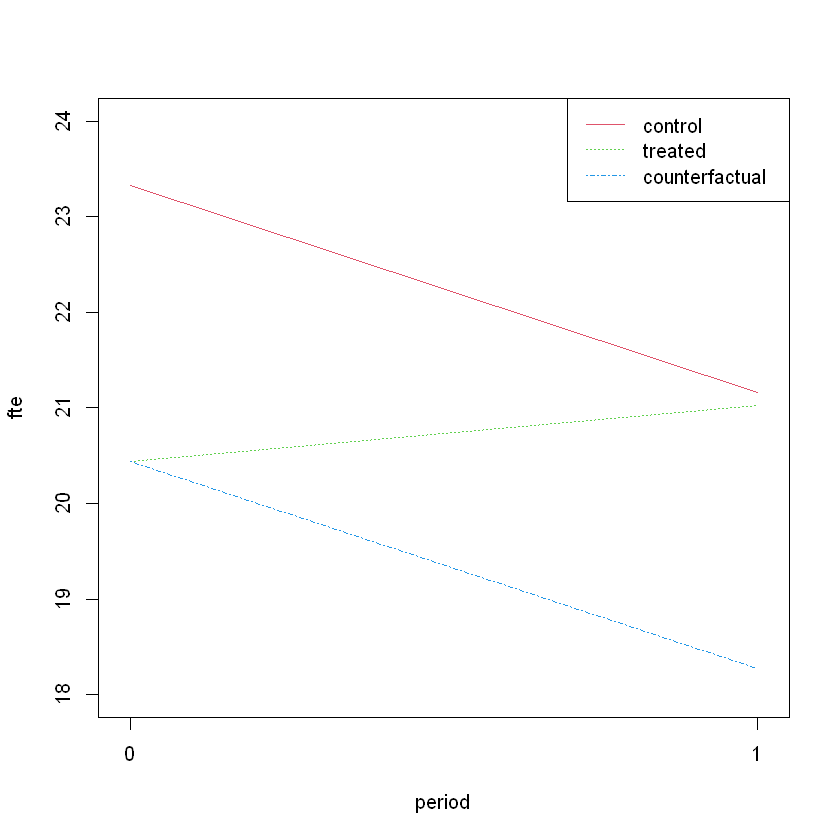

In [5]:
# This creates an empty plot:

plot(1, type="n", xlab="period", ylab="fte", xaxt="n",
     xlim=c(-0.01, 1.01), ylim=c(18, 24))
segments(x0=0, y0=A, x1=1, y1=E, lty=1, col=2)#control
segments(x0=0, y0=B, x1=1, y1=C, lty=3, col=3)#treated
segments(x0=0, y0=B, x1=1, y1=D,      #counterfactual
         lty=4, col=4)
legend("topright", legend=c("control", "treated", 
                            "counterfactual"), lty=c(1,3,4), col=c(2,3,4))
axis(side=1, at=c(0,1), labels=NULL)
